Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
    5.843333     3.057333     3.758000     1.199333

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.6856935    0.1899794    3.1162779    0.5810063

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.8280661    0.4358663    1.7652982    0.7622377

$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

[1] 22 28 50 29 21

[1] 0.848611

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-1.3477916,0.1187465,-1.3100027,-1.2931622378
2,-0.7467198,1.4252951,-1.2932659,-1.2173430935
3,0.3558492,-0.3930869,0.5846038,0.5466361525
4,1.3926646,0.2323817,1.1567451,1.2132759051
5,-0.3628650,-1.4097814,0.1074147,0.0008746178


     1    2    3    4    5
1 0.00 1.44 3.18 4.46 2.64
2 1.44 0.00 3.34 4.23 3.41
3 3.18 3.34 0.00 1.50 1.44
4 4.46 4.23 1.50 0.00 2.89
5 2.64 3.41 1.44 2.89 0.00

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,0.08,0.29,0.01,0.01
2,0.11,0.37,0.01,0.02
3,0.19,0.20,0.07,0.14
4,0.34,0.38,0.10,0.14
5,0.25,0.21,0.07,0.07


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-5.802766e-16  2.457294e-16 -3.848773e-17 -1.021405e-16

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
        0.81         0.72         0.94         0.91

[1] 505.7722

[1] 505.7722

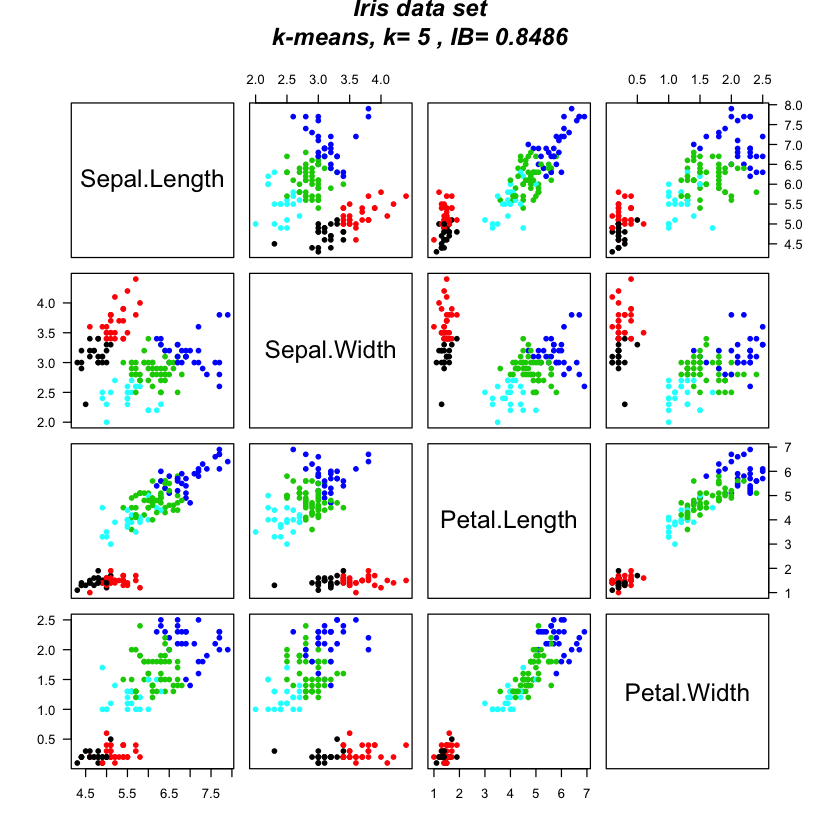

1,4.727273,3.109091,1.445455,0.2136364
2,5.225000,3.678571,1.475000,0.2714286
3,6.138000,2.886000,4.790000,1.6160000
4,6.996552,3.158621,5.800000,2.1241379
5,5.542857,2.442857,3.947619,1.2000000


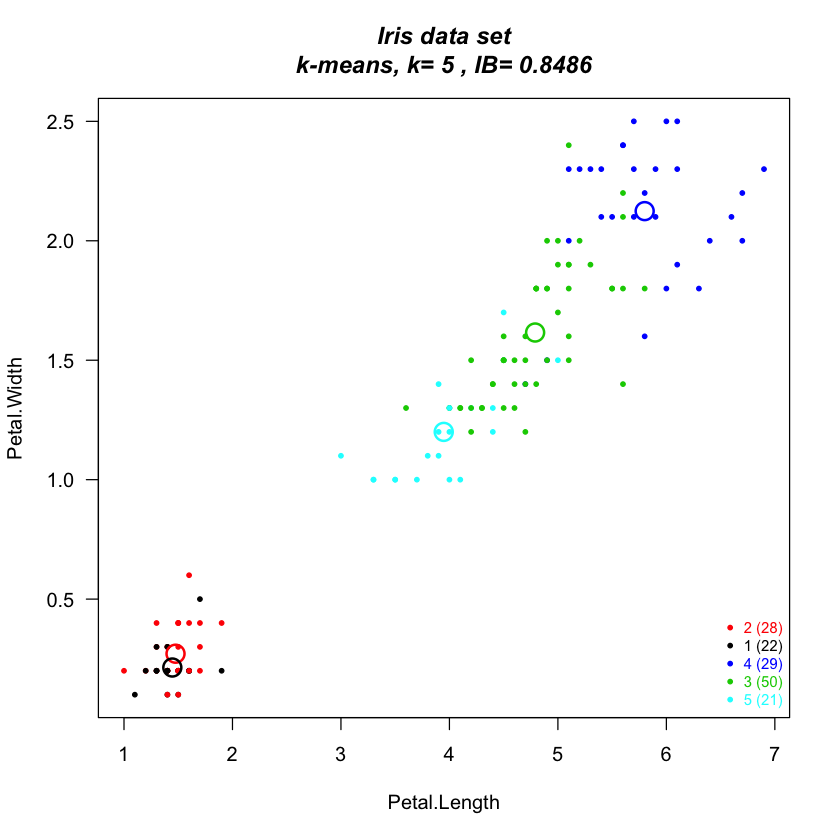

In [1]:
###########################################################################
#
# Interpretación de una partición o clasificación
#
###########################################################################
#
# Recuperación del ejemplo tratado anteriormente
#
# Introducción de los datos: 'iris'
#
datos0 <- iris[,1:4]
#
# Cálculo de los estadísticos principales por variables
#
( medias.tot   <- apply(datos0, 2, mean) )
( var.tot      <- apply(datos0, 2, var ) )
( desv.st.tot  <- apply(datos0, 2, sd  ) )
#
# Estandarización de las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
# Fijar las semillas iniciales para obtener los mismos resultados
#
set.seed(2011)
#
# 'k' arbitrario
#
k <- 5
km <- kmeans(datos, k) 
attributes(km)
#
km$size
#
# 22 28 50 29 21
#
###########################################################################
#
# Interpretación de la clasificación:
#                                    1. Índice de bondad 
#                                    2. Análisis de estadísticos
#                                    3. Representación gráfica 
#
#########################
#
# 1. Índice de la bondad de las clases formadas: 'IB'
#
IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
IB
#
#     0 <= IB <= 1
#          Si IB=0, entonces las clases formadas no tienen sentido,
#                   pues los centros de clases coinciden 
#                   (km$betweenss=0)
#          Si IB=1, entonces las clases formadas son homogéneas,
#                   pues los elementos de la misma clase coinciden 
#                   (km$tot.withinss=0)
#
# IB=0.848611 es un valor francamente alto: 
#             casi el 85% de la SST (~varianza Total) (596=4*(150-1))
#             está explicada por la SSB (~varianza Between) de las 5 clases,
#             donde cada clase está representada por su centro.
#
#########################
#
# 2. Análisis de estadísticos de cada variable por clases
#
##########
#
#              Media de cada variable por clases  
km$centers
#
#              Cálculo de distancias entre centros de clase
#
round(dist(km$centers, diag=TRUE, upper=TRUE), digits=2)
#
#      1    2    3    4    5
# 1 0.00 1.44 3.18 4.46 2.64
# 2 1.44 0.00 3.34 4.23 3.41
# 3 3.18 3.34 0.00 1.50 1.44
# 4 4.46 4.23 1.50 0.00 2.89
# 5 2.64 3.41 1.44 2.89 0.00
#
#    Se observa que los centros de las clases:
#               '1' y '2' se separan de los de '3', '4' y '5'
#
# Una representación lineal (ya se precisará en otra lección) sería:
#
#                    2   1     5   3   4 
#
##########
#
#              Varianza de cada variable por clases
#
varcl <- matrix(rep(0, k*ncol(datos)), ncol=ncol(datos))
for(j in 1:ncol(datos))
   varcl[,j] <- tapply(datos[,j], km$cluster, var)
rownames(varcl) <- 1:k; colnames(varcl) <- colnames(datos)
#
round(varcl, digits=2) 
#
#   Sepal.Length Sepal.Width Petal.Length Petal.Width
# 1         0.08        0.29         0.01        0.01
# 2         0.11        0.37         0.01        0.02
# 3         0.19        0.20         0.07        0.14
# 4         0.34        0.38         0.10        0.14
# 5         0.25        0.21         0.07        0.07
#
#    Se observa que las variables 'Petal.Length' y 'Petal.Width'
#               son las de menor varianza en todas las clases;
#               por tanto, las más características de cada clase
#
##########
#
#              Varianza de cada variable entre clases 
#
medias.pond <- vector()
for(j in 1:ncol(datos))
   medias.pond[j] <- sum(km$size*km$centers[,j])/sum(km$size)
names(medias.pond) <- colnames(datos)
medias.pond # si ha habido estandarización, todas nulas
#
varB.pond <- vector() # varB.pond[j], varianza ponderada por clases
for(j in 1:ncol(datos))
   varB.pond[j] <- 
       sum(km$size*(km$centers[,j]-medias.pond[j])^2)/sum(km$size)
names(varB.pond) <- colnames(datos)
#
round(varB.pond, digits=2)
#
# Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
#         0.81         0.72         0.94         0.91 
#
# Verificación de la descomposición de B
#
sum(varB.pond)*nrow(datos); km$betweenss 
#
#    Se observa que las variables 'Petal.Length' y 'Petal.Width' 
#               son las de mayor varianza; 
#               por tanto, las más características de 
#               la constitución de las clases
#
#########################
#
# 3. Representación gráfica de las clases: 
#
#              Por cada par de variables
#
pairs(datos0, pch=19, cex=0.75, col=km$cluster, las=1,
      main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
      font.main=4)
#
#              Por un par de variables características
#
elecx <- 3; elecy <- 4         # 'Petal.Length' y 'Petal.Width'
plot(datos0[,c(elecx,elecy)], pch=20, cex=0.75, col=km$cluster, las=1,
     main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
     font.main=4, xlab=names(datos0)[elecx], ylab=names(datos0)[elecy])
#
#                      Ubicación de los centros de clase
#
kmcenters <- matrix(rep(0, k*ncol(datos0)), ncol=ncol(datos0))
for(j in 1:ncol(datos0))
      kmcenters[,j] <- tapply(datos0[,j], km$cluster, mean)
rownames(kmcenters) <- 1:k; colnames(kmcenters) <- colnames(kmcenters)
#
kmcenters
#
etclases <- unique(km$cluster) # etiquetas de las clases
#
points(kmcenters[etclases,c(elecx,elecy)], 
       col=etclases, pch=1, cex=2, lwd=2)
#
legend("bottomright", bty="n", 
       x.intersp=1, y.intersp=1,
       legend=paste(etclases,' (',km$size[etclases],')',sep=""),  
       pch=20, col=etclases, text.col=etclases, ncol=1, cex=0.75)
#
#    Se observa que la posición de los centros de clase 
#               en la diagonal principal reproduce aproximadamente
#               el orden de las clases 
#               según las distancias entre sus centros de clase
#               (representación lineal dada anteriormente)
#
#    Se observa que las clases '1' y '2' podrían considerarse como una sola 
#               que las clases '3', '4' y '5' podrían considerarse
#                            como una sola, como dos, como tres, ...
#                            pues conforman un continuo.
#
#    La exploración con k=5 y su análisis conduce a analizar k=2,3,4,...
#
###########################################################################

[1] 0.848611

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-1.3477916,0.1187465,-1.3100027,-1.2931622378
2,-0.7467198,1.4252951,-1.2932659,-1.2173430935
3,0.3558492,-0.3930869,0.5846038,0.5466361525
4,1.3926646,0.2323817,1.1567451,1.2132759051
5,-0.3628650,-1.4097814,0.1074147,0.0008746178


     1    2    3    4    5
1 0.00 1.44 3.18 4.46 2.64
2 1.44 0.00 3.34 4.23 3.41
3 3.18 3.34 0.00 1.50 1.44
4 4.46 4.23 1.50 0.00 2.89
5 2.64 3.41 1.44 2.89 0.00

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,0.08,0.29,0.01,0.01
2,0.11,0.37,0.01,0.02
3,0.19,0.20,0.07,0.14
4,0.34,0.38,0.10,0.14
5,0.25,0.21,0.07,0.07


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-5.802766e-16  2.457294e-16 -3.848773e-17 -1.021405e-16

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
        0.81         0.72         0.94         0.91

[1] 505.7722

[1] 505.7722

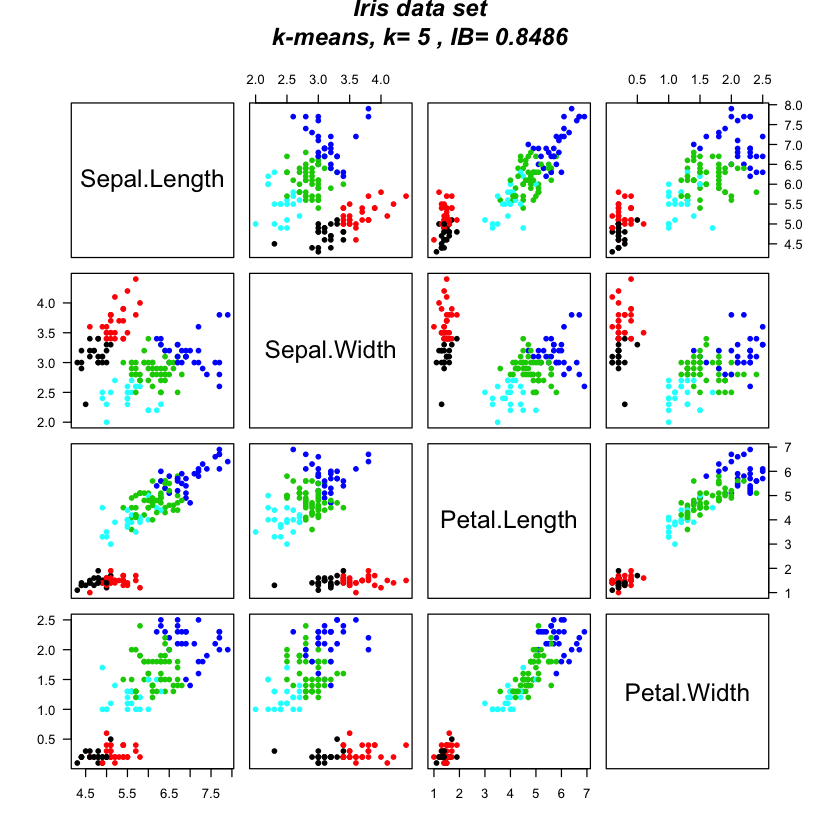

1,4.727273,3.109091,1.445455,0.2136364
2,5.225000,3.678571,1.475000,0.2714286
3,6.138000,2.886000,4.790000,1.6160000
4,6.996552,3.158621,5.800000,2.1241379
5,5.542857,2.442857,3.947619,1.2000000


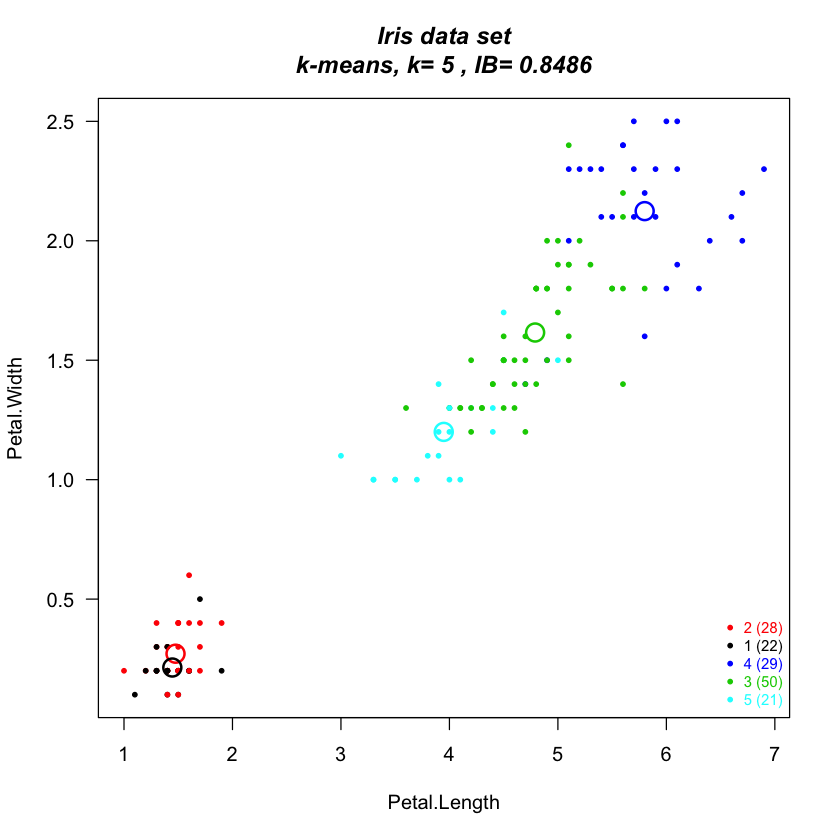

In [2]:
###########################################################################
#
# Interpretación de la clasificación:
#                                    1. Índice de bondad 
#                                    2. Análisis de estadísticos
#                                    3. Representación gráfica 
#
#########################
#
# 1. Índice de la bondad de las clases formadas: 'IB'
#
IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
IB
#
#     0 <= IB <= 1
#          Si IB=0, entonces las clases formadas no tienen sentido,
#                   pues los centros de clases coinciden 
#                   (km$betweenss=0)
#          Si IB=1, entonces las clases formadas son homogéneas,
#                   pues los elementos de la misma clase coinciden 
#                   (km$tot.withinss=0)
#
# IB=0.848611 es un valor francamente alto: 
#             casi el 85% de la SST (~varianza Total) (596=4*(150-1))
#             está explicada por la SSB (~varianza Between) de las 5 clases,
#             donde cada clase está representada por su centro.
#
#########################
#
# 2. Análisis de estadísticos de cada variable por clases
#
##########
#
#              Media de cada variable por clases  
km$centers
#
#              Cálculo de distancias entre centros de clase
#
round(dist(km$centers, diag=TRUE, upper=TRUE), digits=2)
#
#      1    2    3    4    5
# 1 0.00 1.44 3.18 4.46 2.64
# 2 1.44 0.00 3.34 4.23 3.41
# 3 3.18 3.34 0.00 1.50 1.44
# 4 4.46 4.23 1.50 0.00 2.89
# 5 2.64 3.41 1.44 2.89 0.00
#
#    Se observa que los centros de las clases:
#               '1' y '2' se separan de los de '3', '4' y '5'
#
# Una representación lineal (ya se precisará en otra lección) sería:
#
#                    2   1     5   3   4 
#
##########
#
#              Varianza de cada variable por clases
#
varcl <- matrix(rep(0, k*ncol(datos)), ncol=ncol(datos))
for(j in 1:ncol(datos))
   varcl[,j] <- tapply(datos[,j], km$cluster, var)
rownames(varcl) <- 1:k; colnames(varcl) <- colnames(datos)
#
round(varcl, digits=2) 
#
#   Sepal.Length Sepal.Width Petal.Length Petal.Width
# 1         0.08        0.29         0.01        0.01
# 2         0.11        0.37         0.01        0.02
# 3         0.19        0.20         0.07        0.14
# 4         0.34        0.38         0.10        0.14
# 5         0.25        0.21         0.07        0.07
#
#    Se observa que las variables 'Petal.Length' y 'Petal.Width'
#               son las de menor varianza en todas las clases;
#               por tanto, las más características de cada clase
#
##########
#
#              Varianza de cada variable entre clases 
#
medias.pond <- vector()
for(j in 1:ncol(datos))
   medias.pond[j] <- sum(km$size*km$centers[,j])/sum(km$size)
names(medias.pond) <- colnames(datos)
medias.pond # si ha habido estandarización, todas nulas
#
varB.pond <- vector() # varB.pond[j], varianza ponderada por clases
for(j in 1:ncol(datos))
   varB.pond[j] <- 
       sum(km$size*(km$centers[,j]-medias.pond[j])^2)/sum(km$size)
names(varB.pond) <- colnames(datos)
#
round(varB.pond, digits=2)
#
# Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
#         0.81         0.72         0.94         0.91 
#
# Verificación de la descomposición de B
#
sum(varB.pond)*nrow(datos); km$betweenss 
#
#    Se observa que las variables 'Petal.Length' y 'Petal.Width' 
#               son las de mayor varianza; 
#               por tanto, las más características de 
#               la constitución de las clases
#
#########################
#
# 3. Representación gráfica de las clases: 
#
#              Por cada par de variables
#
pairs(datos0, pch=19, cex=0.75, col=km$cluster, las=1,
      main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
      font.main=4)
#
#              Por un par de variables características
#
elecx <- 3; elecy <- 4         # 'Petal.Length' y 'Petal.Width'
plot(datos0[,c(elecx,elecy)], pch=20, cex=0.75, col=km$cluster, las=1,
     main=paste("Iris data set\nk-means, k=", k, ", IB=", round(IB,4)), 
     font.main=4, xlab=names(datos0)[elecx], ylab=names(datos0)[elecy])
#
#                      Ubicación de los centros de clase
#
kmcenters <- matrix(rep(0, k*ncol(datos0)), ncol=ncol(datos0))
for(j in 1:ncol(datos0))
      kmcenters[,j] <- tapply(datos0[,j], km$cluster, mean)
rownames(kmcenters) <- 1:k; colnames(kmcenters) <- colnames(kmcenters)
#
kmcenters
#
etclases <- unique(km$cluster) # etiquetas de las clases
#
points(kmcenters[etclases,c(elecx,elecy)], 
       col=etclases, pch=1, cex=2, lwd=2)
#
legend("bottomright", bty="n", 
       x.intersp=1, y.intersp=1,
       legend=paste(etclases,' (',km$size[etclases],')',sep=""),  
       pch=20, col=etclases, text.col=etclases, ncol=1, cex=0.75)
#
#    Se observa que la posición de los centros de clase 
#               en la diagonal principal reproduce aproximadamente
#               el orden de las clases 
#               según las distancias entre sus centros de clase
#               (representación lineal dada anteriormente)
#
#    Se observa que las clases '1' y '2' podrían considerarse como una sola 
#               que las clases '3', '4' y '5' podrían considerarse
#                            como una sola, como dos, como tres, ...
#                            pues conforman un continuo.
#
#    La exploración con k=5 y su análisis conduce a analizar k=2,3,4,...
#
###########################################################################

In [3]:
##########################################################################
#
# Siluetas 
#
##########################################################################
#
# Utilidad de las siluetas
#
# Las siluetas sólo dependen de la partición,
# no dependen del algoritmo para obtenerlas
#
# Por tanto, las siluetas valen para validar una partición,
# y para comparar los resultados de diferentes parámetros de un algoritmo,
# así como los de diferentes algoritmos de clustering
# aplicados sobre un mismo conjunto de datos.
#
##########################################################################
#
# Recuperación del ejemplo tratado anteriormente
#
# Introducción de los datos: 'iris'
#
datos0 <- iris[,1:4]
#
# Estandarización de las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
# Construcción de una partición
#
set.seed(2011)
#
k <- 5 # arbitrario
#
km <- kmeans(datos, k, nstart=100, iter.max=10000)
#
# Tamaño de las 'k' clases resultantes
#
km$size
#
# Pertenencia de los objetos a las clases
#
km$cluster
#
# Composición de las 'k' clases resultantes
#
compocl <- vector("list", k)
for(kcl in 1:k) compocl[[kcl]] <- which(km$cluster == kcl)
compocl
#

[1] 25 25 23 48 29

[1] 1 2 2 2 1 1 2 2 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 2 1 1 1 2 2 1
 [38] 1 2 2 1 2 2 1 1 2 1 2 1 2 5 4 5 3 4 4 4 3 4 3 3 4 3 4 3 4 4 3 3 3 4 4 4 4
 [75] 4 4 4 4 4 3 3 3 3 4 4 4 4 3 4 3 3 4 3 3 3 4 4 4 3 3 5 4 5 4 5 5 3 5 4 5 5
[112] 4 5 4 4 5 4 5 5 3 5 4 5 4 5 5 4 4 4 5 5 5 4 4 4 5 5 4 4 5 5 5 4 5 5 5 4 4
[149] 5 4

[[1]]
 [1]  1  5  6 11 15 16 17 18 19 20 21 22 23 28 29 32 33 34 37 38 41 44 45 47 49

[[2]]
 [1]  2  3  4  7  8  9 10 12 13 14 24 25 26 27 30 31 35 36 39 40 42 43 46 48 50

[[3]]
 [1]  54  58  60  61  63  65  68  69  70  80  81  82  83  88  90  91  93  94  95
[20]  99 100 107 120

[[4]]
 [1]  52  55  56  57  59  62  64  66  67  71  72  73  74  75  76  77  78  79  84
[20]  85  86  87  89  92  96  97  98 102 104 109 112 114 115 117 122 124 127 128
[39] 129 133 134 135 138 139 143 147 148 150

[[5]]
 [1]  51  53 101 103 105 106 108 110 111 113 116 118 119 121 123 125 126 130 131
[20] 132 136 137 140 141 142 144 145 146 149

       cluster neighbor    sil_width
  [1,]       1        2  0.346596916
  [2,]       2        1  0.836744716
  [3,]       2        1  0.812981128
  [4,]       2        1  0.852300994
  [5,]       1        2  0.565532506
  [6,]       1        2  0.807244060
  [7,]       2        1  0.495105680
  [8,]       2        1  0.227842501
  [9,]       2        1  0.814297724
 [10,]       2        1  0.826047189
 [11,]       1        2  0.788167219
 [12,]       2        1  0.409513705
 [13,]       2        1  0.844413701
 [14,]       2        1  0.800218106
 [15,]       1        2  0.750054295
 [16,]       1        2  0.656651677
 [17,]       1        2  0.808820230
 [18,]       1        2  0.358499939
 [19,]       1        2  0.778122946
 [20,]       1        2  0.793573429
 [21,]       1        2  0.177726197
 [22,]       1        2  0.744894779
 [23,]       1        2  0.183794267
 [24,]       2        1  0.428662792
 [25,]       2        1  0.389728666
 [26,]       2        1  0.813447474
 

[1] "silhouette"

[1] "numeric"

$dim
[1] 150   3

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "cluster"   "neighbor"  "sil_width"


$Ordered
[1] FALSE

$call
silhouette.default(x = km$cluster, dist = distancias)

$class
[1] "silhouette"


[1] 150

cluster
 1  2  3  4  5 
25 25 23 48 29 

[1] TRUE TRUE TRUE TRUE TRUE

neighbor
 1  2  3  4  5 
24 26 27 51 22 

       neighbor
cluster  1  2  3  4  5
      1  0 25  0  0  0
      2 24  0  1  0  0
      3  0  1  0 22  0
      4  0  0 26  0 22
      5  0  0  0 29  0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1568  0.3593  0.5334  0.5159  0.7270  0.8523 

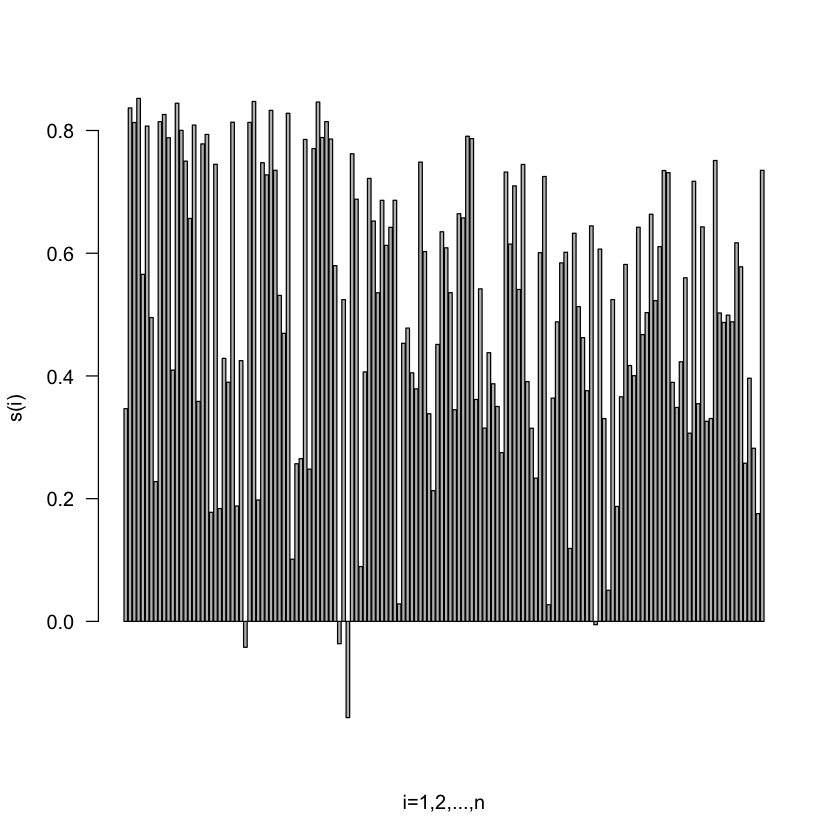

[1] 4

[1]  29  51  53 111

[1] 1 5 5 5

Silhouette of 150 units in 5 clusters from silhouette.default(x = km$cluster, dist = distancias) :
 Cluster sizes and average silhouette widths:
       25        25        23        48        29 
0.5466407 0.6475322 0.5454058 0.4825517 0.4076102 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1568  0.3593  0.5334  0.5159  0.7270  0.8523 

$names
[1] "si.summary"      "clus.avg.widths" "clus.sizes"      "avg.width"      
[5] "call"            "codes"           "Ordered"        

$class
[1] "summary.silhouette"

[1] 0.5158789

[1] TRUE

1         2         3         4         5 
0.5466407 0.6475322 0.5454058 0.4825517 0.4076102

1    2    3    4    5 
TRUE TRUE TRUE TRUE TRUE

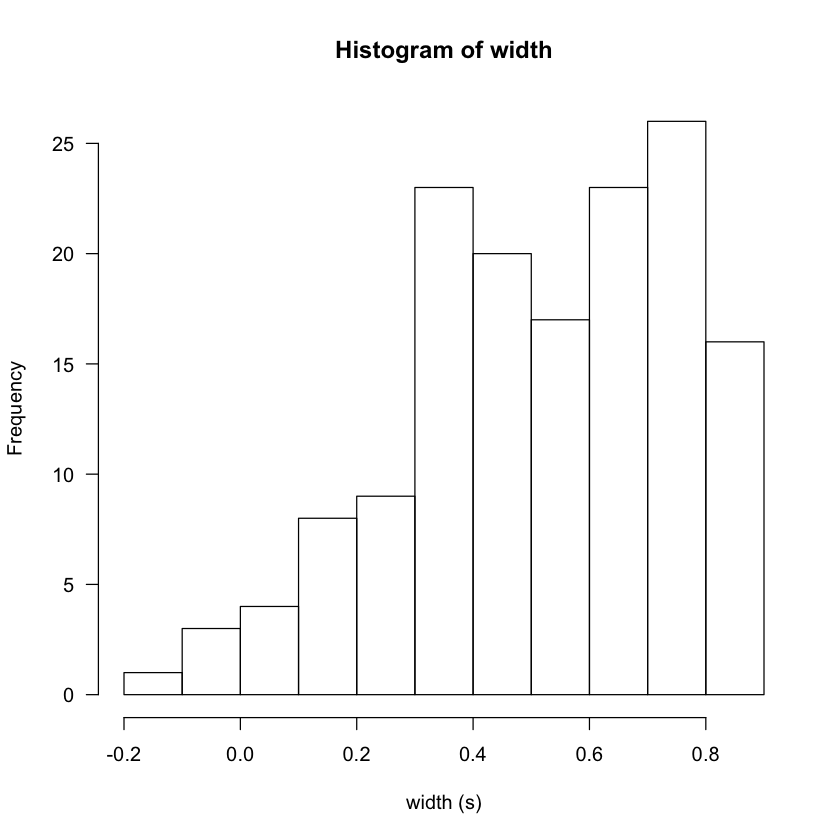

[1] 0.5158789

[1]  29  51  53 111

[1] 1 5 5 5

[1] 2 4 4 4

$names
 [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
 [6] "betweenss"    "size"         "iter"         "ifault"       "cluster.new" 

$class
[1] "kmeans"

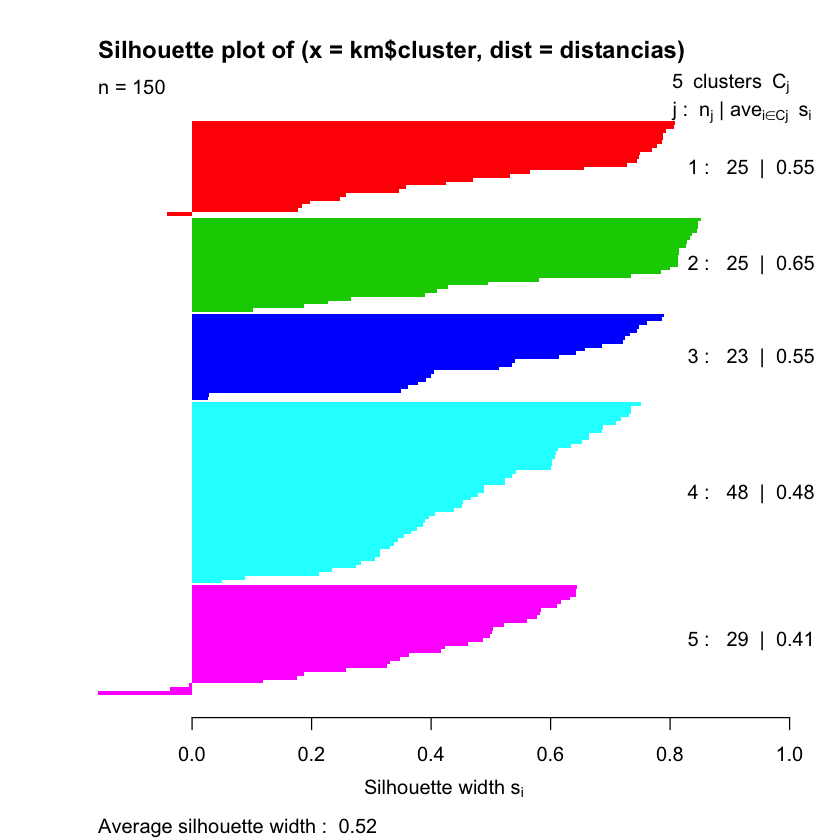

[1] 0.5189867

[1] 114

cluster 
      4

neighbor 
       3

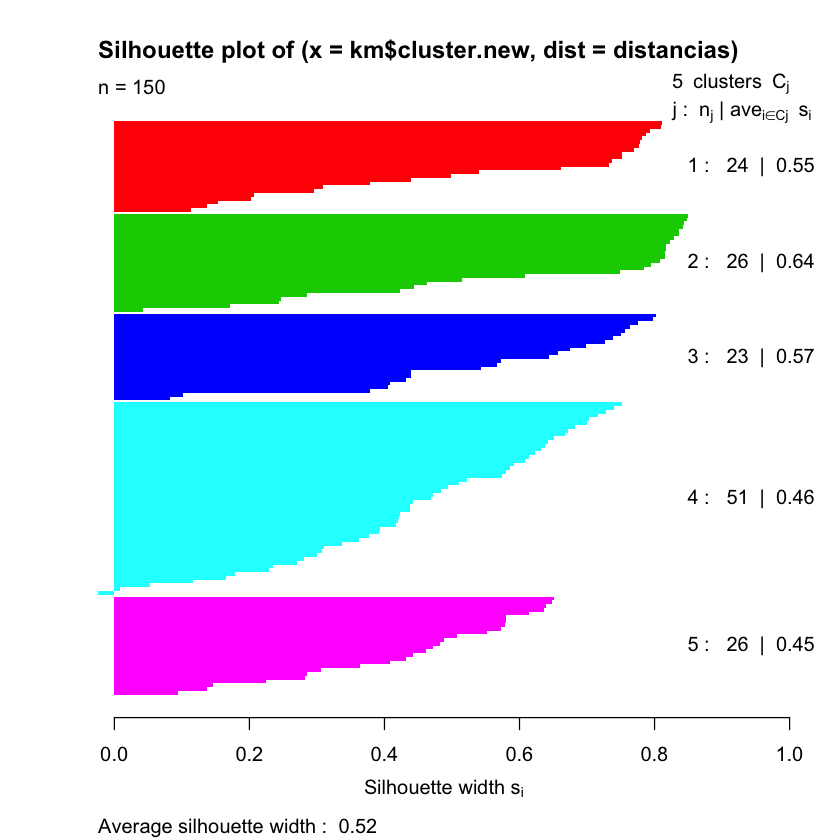

[1] 0.518153

s,width
0.34659692,0.34659692
0.83674472,0.83674472
0.81298113,0.81298113
0.85230099,0.85230099
0.56553251,0.56553251
0.80724406,0.80724406
0.49510568,0.49510568
0.22784250,0.22784250
0.81429772,0.81429772
0.82604719,0.82604719


[1] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
 [25]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE
 [49]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE
 [73] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [97] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
[109] FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE FALSE
[121]  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE
[133] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[145] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 5.100087e-16

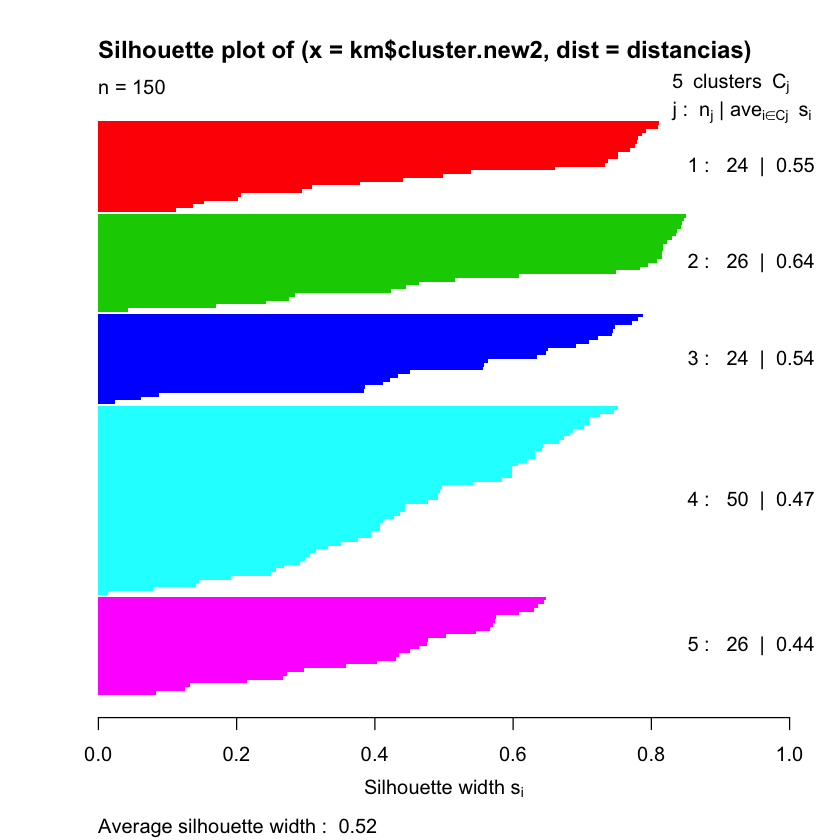

In [4]:
distancias <- dist(datos, method="euclidean", upper=TRUE, diag=TRUE)
distancias <- distancias^2
# 
# Cálculo de los valores 's(i)' ('width'), 
#         mediante la función 'silhouette()'
#         que está en el paquete 'cluster'
# 
# Previamente hay que adquirir el paquete 'cluster':
# > install.packages("cluster")
# 
library(cluster)
#
silk <- silhouette(km$cluster, distancias)
#
silk
#
# Características generales del objeto 'silk'
#                       1. 'cluster'
#                       2. 'neighbor'
#                       3. 'width' ('s(i)')
#
class(silk)
mode(silk)
attributes(silk)
#
#######
#
#  1. 'cluster'
#
cluster <- silk[,1] # atributo 'cluster', clase del objeto 'i'.
length(km$cluster == cluster) # 150, verificación de su coincidencia.
table(cluster)
# 
# cluster
#  1  2  3  4  5 
# 25 25 23 48 29 
# 
# Es posible que las etiquetas de las clases estén alteradas  
# cuando 'kmeans()' se ejecute en otra máquina, o en otro momento.
# 
km$size == as.vector(table(cluster)) # verificación
#
#######
#
#  2. 'neighbor'
#
neighbor <- silk[,2] # atributo 'neighbor', clase vecina o más próxima al objeto 'i'.
table(neighbor)
#
# neighbor
#  1  2  3  4  5 
# 26 24 27 51 22
# 
table(cluster, neighbor) 
#        neighbor 
# cluster  1  2  3  4  5 
#       1  0 24  1  0  0 
#       2 25  0  0  0  0 
#       3  1  0  0 22  0 
#       4  0  0 26  0 22 
#       5  0  0  0 29  0 
# 
#    Se observa que, en general, los vecinos de los de la clase '1' son la clase '2',  
#            y viceversa;
#            los vecinos de los de las clases '3' y '5' son la clase '4',
#            y los vecinos de los dela clase '4' se reparten entre las clases '3' y '5'.
#
#    Se induce que las clases '1' y '2' están por un lado, y las otras por el otro;
#            la clase '4' está entre las clases '3' y '5'.
#
#######
#
#  3. 'width' ('s(i)')
#
width <- silk[,3] # atributo 'sil_width', valor del índice de silueta 's(i)'
summary(width)
#
# Representación gráfica de los valores del índice 's(i)'. 
#
barplot(width, las=1, xlab='i=1,2,...,n', ylab='s(i)')
hist(width, las=1, xlab='width (s)')
#
# Los valores de 's(i)' en torno a 0 significan que son objetos fronterizos
# Los valores negativos de 's(i)' significan que son objetos 'mal clasificados'
#
sum(width < 0) # 4, cantidad de valores < 0 
which(width < 0) #  etiquetas de objetos: 29  51  53 111 
cluster[which(width < 0)] #  clases a las que se asignan dichos objetos: 2 5 5 5 
#
# Hay pocos valores < 0 (4); por tanto, no es una mala clasificación.
#
#############################
#
# 'summary(silk)'
#
# El objeto 'summary(silk)' combina los tres atributos anteriores
# y da informaciones que ayudan a analizar más profundamente
#
summary(silk)
attributes(summary(silk))
#
# El valor medio del índice 's(i)' ('avg.width'), 
# se usa para validar la partición
#
summary(silk)$avg.width # 0.5158789, no es una mala clasificación
mean(width) == summary(silk)$avg.width # verificación 
#
# Los valores medios por clase del índice 's(i)' ('clus.avg.widths'),
# y la negatividad de algunos valores 
# pueden ser usados para determinar el número apropiado de clases 'k'
# (próximo apartado)
#
summary(silk)$clus.avg.widths
mediascl <- tapply(width, cluster, mean)
mediascl == summary(silk)$clus.avg.widths # verificación
#
# Los valores medios por clase no fluctúan mucho, lo cual indica que 
# las clases no están descompensadas en cuanto a la homogeneidad.
#
#############################
#
# Representación gráfica de los valores 's(i)' por clases: siluetas
#
# Una evaluación más detallada de la bondad de la partición
# se puede hacer mediante las siluetas de las clases
#
etclases <- sort(unique(km$cluster))
plot(silk, col=etclases+1)
#
#    Se observa que todos los objetos de las clases '1', '3', y '4' 
#               tienen valores positivos, y 
#               que los cuatro valores negativos corresponden a objetos
#               de la clase '2' (1, etiqueta 29) y 
#               de la clase '5' (3, etiquetas 51  53 111)
#
#############################
#
# Mejora de los resultados del análisis mediante reasignación
#
# Las siluetas pueden servir para mejorar los resultados,
# por ejemplo, moviendo un objeto con valor de s(i)<0 a su clase vecina
#
mean(silk[,3])
# [1] 0.5158789
#
which(silk[,3] < 0)
# [1]  29  51  53 111 # etiquetas de los objetos, ya señaladas anteriormente
#
silk[which(silk[,3] < 0), 1]
# [1]   2   5   5   5 # etiquetas de las clases asignadas, ya señaladas anteriormente
#
silk[which(silk[,3] < 0), 2]
# [1]   1   4   4   4 # etiquetas de las clases vecinas
#
# Reasignación a las clases vecinas
#
km$cluster.new <- km$cluster
km$cluster.new[which(silk[,3] < 0)] <- silk[which(silk[,3] < 0), 2]
#
# Se ha generado una nueva clasificación, 'km$cluster.new'
# que se define como atributo del objeto 'km'
# 
attributes(km)
#
# Cálculo de nuevas siluetas
#
silk <- silhouette(km$cluster.new, distancias)
etclases <- sort(unique(km$cluster))
plot(silk, col=etclases+1)
mean(silk[,3])
# [1] 0.5189867 # se ha mejorado el valor anterior 0.5158789
# Los tamaños de 
# Además no hay más que un objeto cuyo valor 's(i) < 0'.
#
which(silk[,3] < 0)
# [1] 114             # etiquetas de los objetos
#
silk[which(silk[,3] < 0), 1]
# [1]   4 # etiquetas de las clases asignadas
#
silk[which(silk[,3] < 0), 2]
# [1]   3 # etiquetas de las clases vecinas
#
# Nueva reasignación a las clases vecinas
#
km$cluster.new2 <- km$cluster.new
km$cluster.new2[which(silk[,3] < 0)] <- silk[which(silk[,3] < 0), 2]
#
# Cálculo de nuevas siluetas
#
silk <- silhouette(km$cluster.new2, distancias)
etclases <- sort(unique(km$cluster))
plot(silk, col=etclases+1)
mean(silk[,3])
# [1] 0.518153 # no se ha mejorado el valor anterior 0.5189867
# Todos los objetos tienen el valor 's(i) > 0'.
#
# Quedaría por decidir cuál de las dos últimas soluciones es la mejor.
#
#############################
#
# Verificación de los cálculos del valor del índice 's(i)' 
#
#   s(i) = (b(i)-a(i))/max(b(i),a(i)) 
#
#   a(i) = disimilitud media del objeto 'i' con los de su clase
#   b(i) = mínima disimilitud media del objeto 'i' con los de otras clases
#
# Cálculo de los valores 'a(i)', 'b(i)', y 's(i)'
#
a <- rep(NA, nrow(datos))
b <- rep(NA, nrow(datos))
s <- rep(NA, nrow(datos))
#
# Adaptación del objeto 'distancias'
#
distancias.m <- as.matrix(distancias)
#
# 'compocl' da la composición de las 'k' clases resultantes
# 'dmean' da las distancias medias entre los miembros de una misma clase
#
dmean <- matrix(rep(NA, nrow(datos)*k), ncol=k)
#
for(i in 1:nrow(datos)){ 
  for(kcl in 1:k) dmean[i,kcl] <- mean(distancias.m[i, compocl[[kcl]]])
  kcli <- km$cluster[i]
  a[i] <- dmean[i,kcli]*km$size[kcli]/(km$size[kcli]-1)
  b[i] <- min(dmean[i,-kcli])
  s[i] <- (b[i]-a[i])/max(b[i],a[i])
}
#
# width, silk[,3] o 'sil_width', son los 's(i)' iniciales
# 
cbind(s, width)
s == width # FALSE !!! por cuestiones de precisión de cálculos
max(abs(s - width)) # [1] 5.100087e-16
#
# Las siluetas valen para interpretar y validar los resultados
# 'k' pequeño, clases naturales mezcladas:
#             Si 'SSW' grande, 'a(i)' grande, s(i) pequeños.
# 'k' grande, clases naturales separadas:
#             Si 'SSB' pequeño, 'b(i)' pequeño, s(i) pequeños.
#
##########################################################################



$names
[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

$class
[1] "kmeans"

[1] TRUE

[1] 0.8486545

k,IB
1,0.000000
2,0.629397
3,0.766966
4,0.809846
5,0.848655
6,0.866669
7,0.882236
8,0.896273
9,0.909724
10,0.921448


k,IB[k]/IB[k-1],(IB[k]-IB[k-1])/IB[k-1]
3,1.218572,0.218572136
4,1.055909,0.055909178
5,1.047921,0.047920526
6,1.021227,0.021227179
7,1.017961,0.017961331
8,1.015912,0.015911616
9,1.015007,0.015006908
10,1.012888,0.012888003
11,1.007995,0.007994887
12,1.006639,0.006638854


k,DB
1,NA
2,0.384948
3,0.588579
4,0.657674
5,0.719266
6,0.799488
7,0.760642
8,0.757275
9,0.650260
10,0.631136


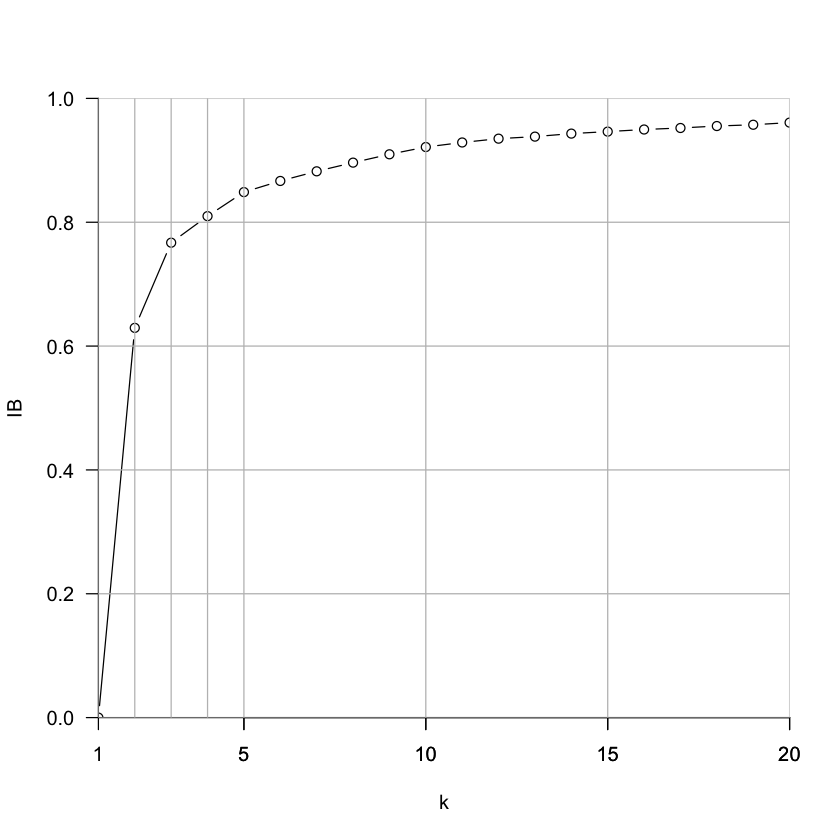

[1] "silhouette"

[1] "numeric"

$dim
[1] 150   3

$dimnames
$dimnames[[1]]
NULL

$dimnames[[2]]
[1] "cluster"   "neighbor"  "sil_width"


$Ordered
[1] FALSE

$call
silhouette.default(x = km$cluster, dist = distancias)

$class
[1] "silhouette"


Silhouette of 150 units in 20 clusters from silhouette.default(x = km$cluster, dist = distancias) :
 Cluster sizes and average silhouette widths:
       17         7         3         9         9         7         6         5 
0.5485634 0.3572783 0.6598356 0.5011969 0.5738300 0.2789664 0.5221689 0.6340007 
        2         1         7         9         4        10         8         8 
0.2491485 0.0000000 0.3702705 0.5023141 0.6943521 0.4447431 0.4944611 0.6522471 
       16         8         8         6 
0.7091565 0.4791124 0.3094344 0.3078122 
Individual silhouette widths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.2293  0.3462  0.5683  0.5017  0.6957  0.8765 

$names
[1] "si.summary"      "clus.avg.widths" "clus.sizes"      "avg.width"      
[5] "call"            "codes"           "Ordered"        

$class
[1] "summary.silhouette"

[1] 0.5016555

k,avg.width
1,NA
2,0.773070
3,0.650740
4,0.571742
5,0.515879
6,0.482383
7,0.482043
8,0.493481
9,0.518080
10,0.515038


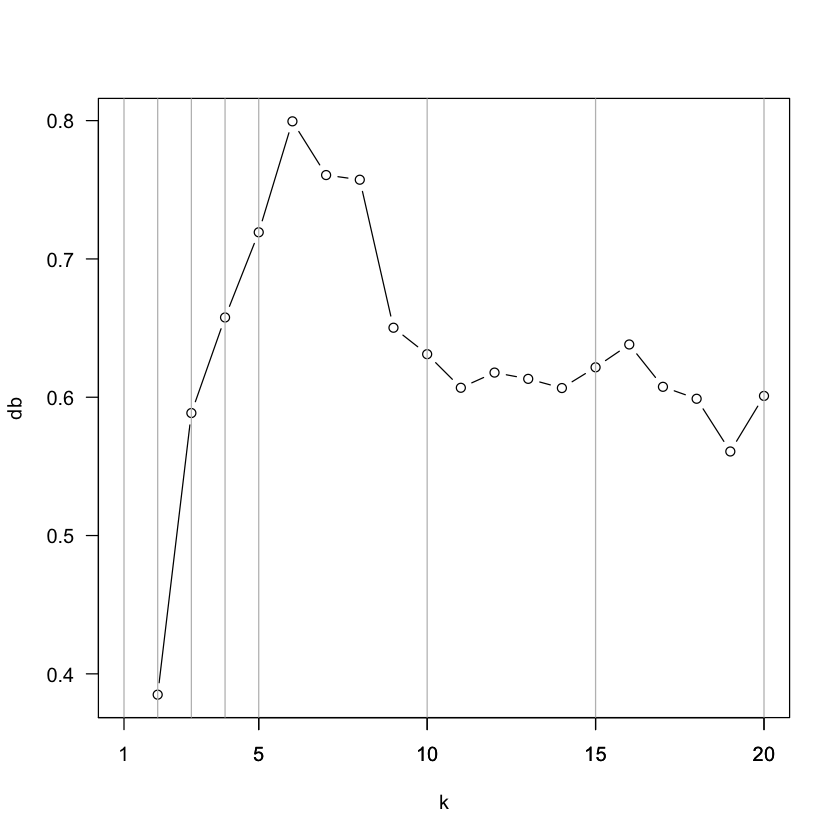

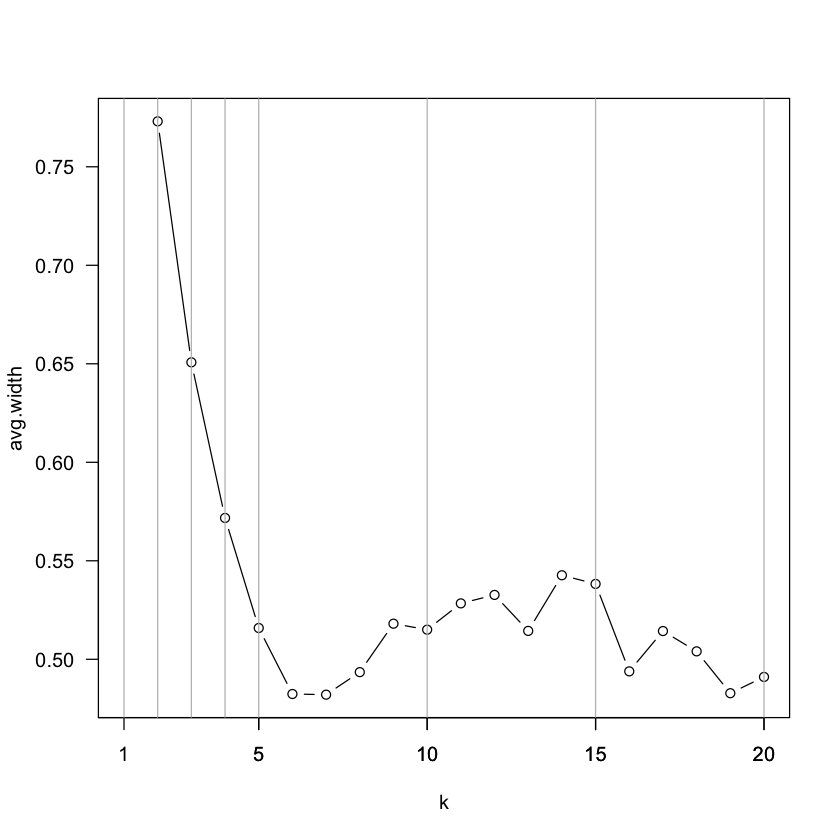

In [5]:
##########################################################################
#
# Selección del valor de 'k' (el número de clases)
#
# https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set
#
##########################################################################
#
# Introducción de los datos: 'iris'
#
datos0 <- iris[,1:4]
#
# Estandarización de las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
# En los apartados anteriores se ha procedido con un 'k' arbitrario
#
k <- 5
km <- kmeans(datos, k, nstart=100, iter.max=10000)
#
attributes(km)
#
#########################################################################
#
# Selección del valor de 'k'.
#
#  Hay varios paquetes o librerías de R dedicadas a este menester: 
#  'clusterCrit', 'clusterSim' y 'NbClust' son tres de ellos.
#  En ellos pueden encontrarse funciones que calculan los valores de 
#  de índices que ayudan a fijar el valor de k, el número de clases. 
#
#  Índices utilizados en esta página:
#                          1.  Índice de bondad, 'IB'
#                          2.  Índice Davies-Bouldin
#                          3.  Valor medio del índice de siluetas
#
############################
#
# 1. Índice de la bondad de la partición: 'IB'
#
#   'km$tot.withinss': Suma de los cuadrados ('squared sum')
#                      de las diferencias de todos ('tot') los objetos 
#                      respecto al centro de su respectiva clase 
#                      Expresa la variabilidad dentro ('within') de las clases
#
#   'km$betweenss'   : Suma de los cuadrados ('squared sum')
#                      de las diferencias de los centros de cada clase
#                      respecto al centro del conjunto de datos
#                      Expresa la variabilidad entre ('between') las clases
#
#   'km$totss'       : Suma de los cuadrados ('squared sum')
#                      de las diferencias de todos ('tot') los objetos
#                      respecto al centro del conjunto de datos
#                      Expresa la variabilidad total del conjunto de datos
#
#   Se cumple la siguiente igualdad:
#
km$totss == km$tot.withinss + km$betweenss
#
#   'IB' expresa la proporción de variabilidad debida a 
#        la formación de las clases 
#
IB <- km$betweenss/km$totss # IB <- 1-km$tot.withinss/km$totss
IB
#
#     0 <= IB <= 1
#
#          Si IB=0, entonces las clases formadas no tienen sentido
#                   pues los centros de clases coinciden 
#                   (km$betweenss=0)
#          Si IB=1, entonces las clases formadas son homogéneas,
#                   pues los elementos de la misma clase coinciden 
#                   (km$tot.withinss=0)
#
#     Un valor de 'IB' cercano a 1
#     indica que las clases son homogéneas y separadas
#
# Cálculo del valor de 'IB' para cada valor de 'k'
# buscando el máximo para cada uno de ellos (con 'nstart'=100)
#
K <- 20 # número máximo de clases
#
IB <- vector()
for(k in 1:K){
  km <- kmeans(datos, k, nstart=100, iter.max=10000)
  IB[k] <- km$betweenss/km$totss
}
#
cbind(k=1:length(IB), IB=round(IB, digits=6))
#
# Representación gráfica de la variación de 'IB' en función de 'k'
#
plot(IB, ylim=c(0,1), bty="n", type="b", xaxs="i", yaxs="i", las=1, xlab="k")
axis(1, at=c(1,seq(0,K,5)))
abline(v=c(1:4,seq(0,K,5)), col="gray")
abline(h=seq(0,1,0.2), col="gray")
#
#    Se observa que el valor de 'IB' crece, lógicamente, con 'k',
#               pues a mayor 'k' mayor 'km$betweenss'.
#    Así, analizar los valores de 'IB'
#    consiste en analizar su crecimiento respecto a 'k':
#         Si hay un salto grande entre dos consecutivos,
#         entonces es señal de que hay dos clases ciertamente separadas
#
selectk <- NULL
for(k in 3:length(IB))
  selectk <- rbind(selectk, c(k,  IB[k]/IB[k-1],  (IB[k]-IB[k-1])/IB[k-1]))
colnames(selectk) <- c("k",  "IB[k]/IB[k-1]",  "(IB[k]-IB[k-1])/IB[k-1]")
selectk  
#
#    Se observa por los saltos que k=2 parece una buena elección,
#                                y k=3 podría serla también.
#
############################
#
# 2. Índice de Davies-Bouldin           
#
# La distancia debe estar en consonancia 
# con la función objetivo de 'kmeans()':
# distancia euclidiana cuadrática 
#
# distancias <- dist(datos, method="euclidean", diag=TRUE, upper=TRUE)^2 
# 
# 
# Composición de las clases
#
# compocl <- vector("list", k)
# for(kcl in 1:k) compocl[[kcl]] <- which(km$cluster == kcl)
#
#
# Definición del índice 'DB' mediante una función
#
DB <- function(distancias.m, compocl, k){
#
#  'distancias.m' es la matriz de distancias entre objetos dos a dos
#  'compocl' es una lista con los componentes de las 'k' clases
#  'k' es el número de clases
#
#   Distancias medias 'dentro de' y 'entre' las clases: 'Mcl'
#                     'dentro de': diagonal de 'Mcl'
#                     'entre'    : fuera de la diagonal de 'Mcl'
 Mcl <- matrix(rep(0,k*k), ncol=k) # inicialización
 for(kcli in 1:k){
   for(kclj in 1:k){
      Mcl[kcli,kclj] <- mean(distancias.m[compocl[[kcli]], compocl[[kclj]]])
   }
 }
# 
# Cálculo de ratios
#
 R <- matrix(rep(0,k*k), ncol=k)
 for(kcli in 1:k){
   for(kclj in 1:k){
      R[kcli,kclj] <- (Mcl[kcli,kcli]+Mcl[kclj,kclj])/Mcl[kcli,kclj]
   }
 }
#
# Cuanto menor sea R, mayor será la separación entre clases 
#
# Se adopta el peor de los casos para definir el índice
#
 D <- rep(0,k)
 for(kcl in 1:k){
    D[kcl] <- max(R[kcl,-kcl])
 }
#
# Cálculo del valor del índice de Davies-Bouldin
#
 DB <- mean(D)
#
# Cuanto menor es el índice, mejor es la partición
#
 return(DB)
#
}
#
###
#
# Aplicación de la función 'DB'
#
distancias <- dist(datos, method="euclidean", diag=TRUE, upper=TRUE)^2 
#
# Adecuación del objeto 'distancias' a un tipo de objeto manejable para lo que sigue
#
distancias.m <- as.matrix(distancias, ncol=nrow(datos)) # formato necesario
#
# Cálculo del valor de 'DB' para cada valor de 'k'
# buscando el mínimo 
#
db <- NA # db[1] no tiene sentido
for(k in 2:20)
{
  km <- kmeans(datos, k, nstart=100, iter.max=10000)
  compocl <- vector("list", k)
  for(kcl in 1:k) compocl[[kcl]] <- which(km$cluster == kcl)
  ( DB(distancias.m, compocl,k) )
  db[k] <- DB(distancias.m, compocl,k)
}
#
cbind(k=1:length(db), DB=round(db, digits=6))
#
# Representación gráfica de la variación de 'db' en función de 'k'
#
plot(db, type="b", las=1, xlab="k")
axis(1, at=c(1,seq(0,K,5)))
abline(v=c(1:4,seq(0,K,5)), col="gray")
#
#    Se observa que k=2 da el mínimo; k=3 es el siguiente mínimo.
# 
#    Se observa que si se ejecuta del código de buscar el mínimo varias veces, 
#               a partir de k=6 los valores cambian.
#    Esto se debe al valor del parámetro 'nstart' de 'kmeans()'.
#    Cuanto mayor sea k, mayor valor se necesita en 'nstart',
#    si se quiere obtener la misma partición 
#    (la mejor de todas las ejecutadas).
# 
############################
#
# 3. Valor medio del índice de siluetas 's(i)'
#
# La distancia debe estar en consonancia 
# con la función objetivo de 'kmeans()'
# distancia euclidiana cuadrática 
#
distancias <- dist(datos, method="euclidean", diag=TRUE, upper=TRUE)^2
#
# Cálculo del valor del índice 's(i)' ('widths'), 
#         asignado a cada objeto 'i',
#         mediante la función 'silhouette()'
#         http://en.wikipedia.org/wiki/Silhouette_%28clustering%29
# 
# Previamente hay que adquirir el paquete 'cluster':
# > install.packages("cluster")
#
library(cluster)
#
silk <- silhouette(km$cluster, distancias)
#
class(silk)
mode(silk)
attributes(silk)
#
summary(silk)
attributes(summary(silk))
# 
# El valor medio del índice 's(i)' ('avg.width'), 
# es un índice de la bondad de la partición
#            -1 <= s(i) <= +1
# y, por tanto, el valor medio también
# 
summary(silk)$avg.width
# 
# Se analiza este valor para distintos valores de 'k'
#
avg.width <- NA # avg.width[1] no tiene sentido
for(k in 2:20)
{
  km <- kmeans(datos, k, nstart=100, iter.max=10000)
  silk <- silhouette(km$cluster, distancias)
  avg.width[k] <- summary(silk)$avg.width
}
#
cbind(k=1:length(avg.width), avg.width=round(avg.width, digits=6))
#
#
# Representación gráfica de la variación de 'avg.width' en función de 'k'
#
plot(avg.width, type="b", las=1, xlab="k")
axis(1, at=c(1,seq(0,K,5)))
abline(v=c(1:4,seq(0,K,5)), col="gray")
#
#    Se observa que k=2 da el máximo; k=3 es el siguiente máximo.
#
##########################################################################
#
#   Según los tres criterios analizados, 
#   hay un consenso en que k=2 es el mejor número de clases,
#   y que k=3 es la siguiente opción.
#
##########################################################################


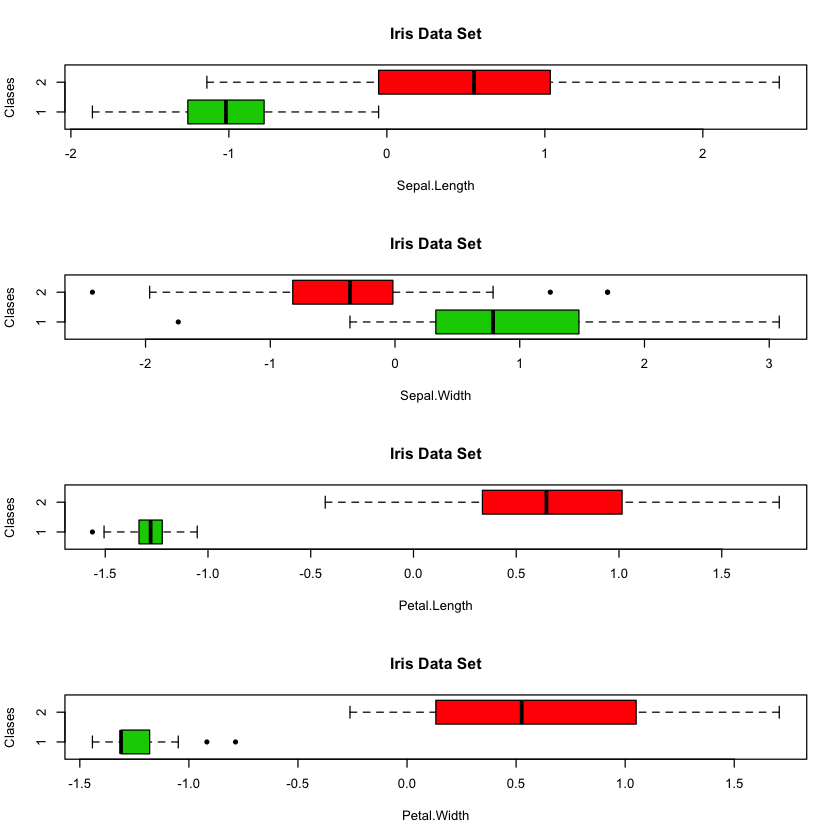

[1] 0.6293972

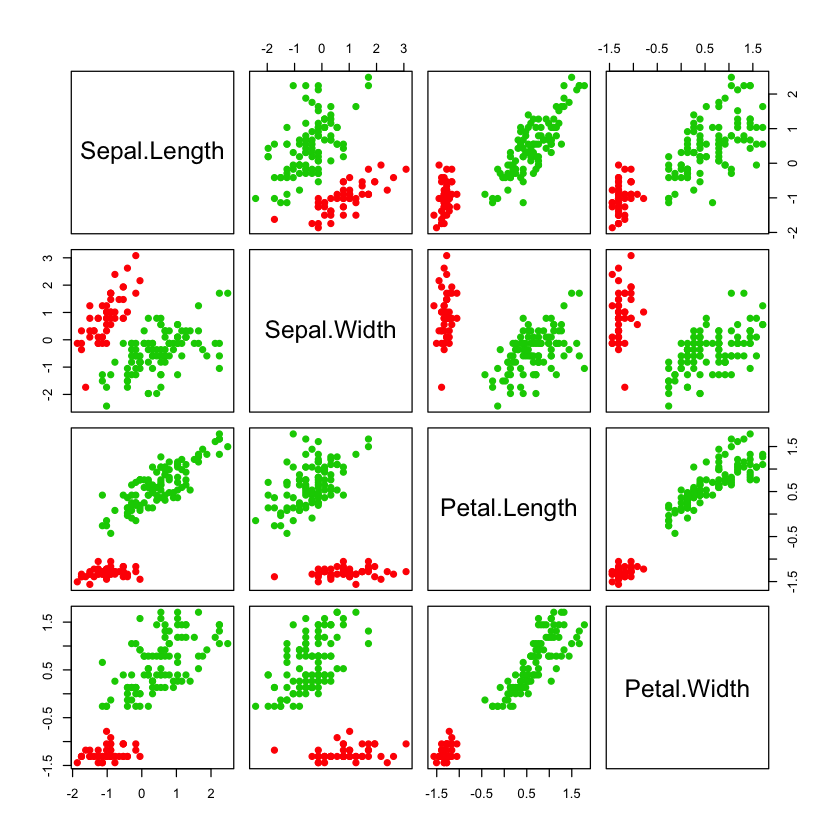

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
clase 1,-1.0111914,0.8504137,-1.300630,-1.2507035
clase 2,0.5055957,-0.4252069,0.650315,0.6253518


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
clase 1,0.1812019,0.756344,0.009677951,0.01911532
clase 2,0.6407374,0.582817,0.218715991,0.31054447


Sepal.Length   Sepal.Width  Petal.Length   Petal.Width 
-4.484318e-16  2.034094e-16 -2.895326e-17 -3.663049e-17

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
   0.5112540    0.3616017    0.8458193    0.7821296

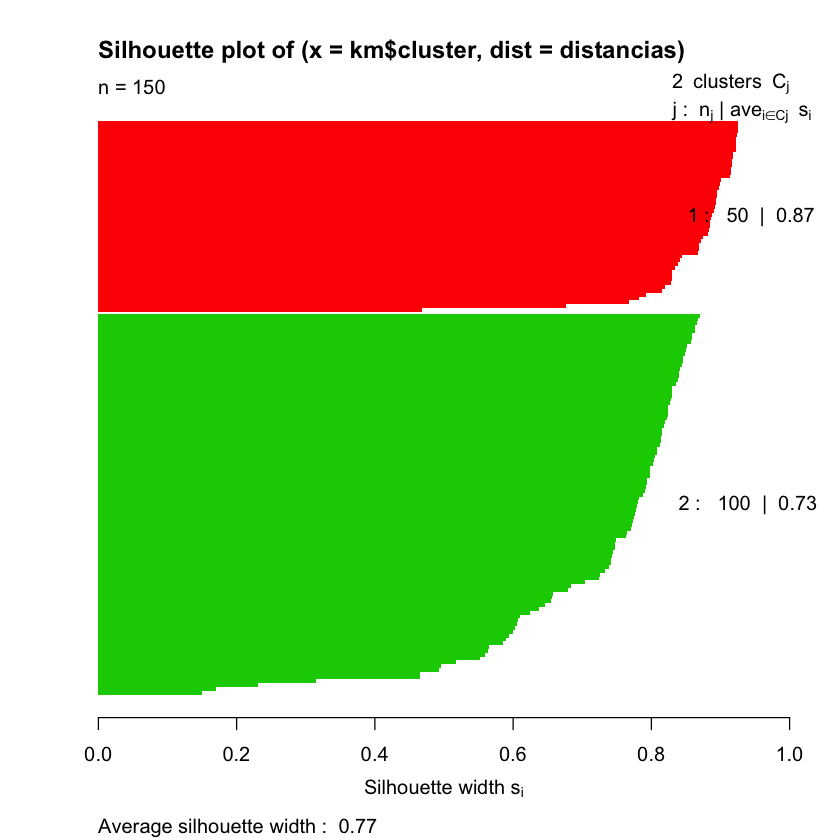

In [6]:
#########################################################################
# 
# Introducción de los datos: 'iris'
#
datos0 <- iris[,1:4]
#
# Estandarización de las variables (media 0, varianza 1)
#
datos <- scale(datos0)
#
#########################################################################
#
# Selección del valor del parámetro 'k'.
#
# Tras las consideraciones mostradas en los apartados anteriores: k=2 .
#
k <- 2
km <- kmeans(datos, k, nstart=100, iter.max=10000)
#
###################################
#
# Representación gráfica de las clases obtenidas
#                        por variables
#
par(mfrow=c(4,1))
for(j in 1:4)
     boxplot(datos[,j] ~ km$cluster, pch=19, horizontal=TRUE, 
             col=rev(unique(km$cluster))+1,
             xlab=colnames(datos)[j], ylab="Clases",
             main="Iris Data Set")
par(mfrow=c(1,1))
#
#
#                        por pares de variables
#
pairs(datos, pch=19, col=km$cluster+1)
#
#    Se observa que ambas clases están separadas
#               en las variables de 'Petal.*'
#               y no en las  de 'Sepal.*'.
#               También están separadas
#               en todos los planos (pares de variables);
#               además, se podría trazar una línea recta
#               de separación entre ambas clases.
#
###################################
#
# Ìndice de la bondad de la partición
#
( IB <- km$betweenss/km$totss ) # [1] 0=0.6293972
#
# La consideración de estas dos clases o conglomerados (clusters)
# explica casi el 63% de la varianza inicial (bastante alto) 
#
###################################
#
# Siluetas
#
# La distancia debe estar en consonancia
# con la función objetivo de 'kmeans()'
# distancia euclidiana cuadrática
#
distancias <- dist(datos, method="euclidean")^2
#
library(cluster)
#
silk <- silhouette(km$cluster, distancias)
#
etclases <- sort(unique(km$cluster))
plot(silk, col=etclases+1)
#
#    Se observa que las dos clases están bien conformadas,
#               pues todos los objetos tienen 's(i) >0',
#               los valores medios de 's(i)' por clase son altos,
#               y parecidos,
#               y el valor medio global de 's(i)' alto (0.77).
#
###################################
#
# Análisis estadístico de las clases formadas
#
#                  1. Dentro de las clases (W)
#                  2. Entre las clases     (B)
#
nomvar <- paste('clase ', 1:k, sep="")
#
##############
#
#    1. Dentro de las clases (W)
#              Cálculo de medias
#
medias.cl <- matrix(rep(0, k*ncol(datos)), ncol=ncol(datos))
for(j in 1:ncol(datos))
   medias.cl[,j] <- tapply(datos[,j], km$cluster, mean)
#
colnames(medias.cl) <- colnames(datos)
rownames(medias.cl) <- nomvar
#
medias.cl
#         Sepal.Length Sepal.Width Petal.Length Petal.Width
# clase 1    0.5055957  -0.4252069     0.650315   0.6253518
# clase 2   -1.0111914   0.8504137    -1.300630  -1.2507035
#
##############
#
#              Cálculo de varianzas
#
#
var.cl <- matrix(rep(0, k*ncol(datos)), ncol=ncol(datos))
for(j in 1:ncol(datos))
   var.cl[,j] <- tapply(datos[,j], km$cluster, var)
#
colnames(var.cl) <- colnames(datos)
rownames(var.cl) <- nomvar
#
var.cl
#
#         Sepal.Length Sepal.Width Petal.Length Petal.Width
# clase 1    0.6407374    0.582817  0.218715991  0.31054447
# clase 2    0.1812019    0.756344  0.009677951  0.01911532
#
#    Se observa que las medias de las variables se distinguen
#               más en las medidas de 'Petal.*' que
#               en las de 'Sepal.*' 
#               La variabilidad de los datos 
#               en las variables 'Petal.*' es mucho menor que 
#               en las variables 'Sepal.*' 
#
##############
#
#    1. Entre las clases (W)
#              Cálculo de medias totales
#                     Si las variables están estandarizadas, 0.
#
( medias.tot <- apply(datos, 2, mean) )  # colMeans(datos)
#
#              Cálculo de varianzas entre clases
#
varB.pond <- vector() # varB.pond[j], varianza ponderada de la variable j .
for(j in 1:ncol(datos))
   varB.pond[j] <- sum(km$size*(medias.cl[,j]-medias.tot[j])^2)/nrow(datos)
#
names(varB.pond) <- colnames(datos)
#
varB.pond
#
# Sepal.Length  Sepal.Width Petal.Length  Petal.Width
#    0.5112540    0.3616017    0.8458193    0.7821296
#
#    Se observa que las dos de 'Petal.*' son las que más explican
#               la consideración de las dos clases o conglomerados.
#               Este detalle ya ha sido señalado cuando se han
#               comentado las diferencias de medias.
#         
##########################################################################


In [7]:
# Edición de las soluciones a los ejercicios
#
pdf("ejercicio2solkm.pdf")
#
nexamples <- nlevels(data$example)
#
for(kex in 1:nexamples)
{
  data1 <- data[data[,3]==kex, 1:2]
  x.m <- data1
  km <- kmeans(x.m, centers=2, nstart=10)
#
  plot(data1, pch=21, cex=0.75, col="black", bg="white"
       , axes=FALSE, xlab="", ylab="", frame.plot=FALSE)
  points(x.m, pch=21, cex=0.8, col="black", bg=km$cluster+1)
  points(km$centers, col=(1:nrow(km$centers))+1, pch=8, cex=1.5)
  mtext(kex, side=3, adj=0, cex=1)
  if(kex==1) title("Conjuntos de datos", line=5, outer=TRUE)
}
#
dev.off()
#

ERROR: Error in data$example: objeto de tipo 'closure' no es subconjunto
